# Teste 1 realizado por Nicolas Lovatte Schneebeli 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import scipy.signal as sp
from scipy.interpolate import griddata

In [3]:
#Tapete Vazio:
vazio=open("Teste1/tapete_vazio.txt",'r')
vazio=pd.read_csv(vazio,skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1","PEAKS2","PEAKS4","PEAKS5","PEAKS6","PEAKS7","PEAKS8"], sep="\t",decimal=',')
importante= open("DadosImportantes.txt","r")
DadosVazioKs=pd.read_csv(importante,names=["Sen1","Sen2","Sen3","Sen5","Sen6","Sen7","Sen8","K1","K2","K3","K5","K6","K7","K8"],sep="\t")

In [4]:
vazio["PEAKS3"]=vazio["PEAKS4"]
vazio=vazio.drop(["PEAKS4"],axis=1)


In [5]:
picos_vazios=vazio.loc[:,["PEAKS1",'PEAKS2','PEAKS3','PEAKS5',"PEAKS6",'PEAKS7','PEAKS8']]
medias=[]
for i in range (0, 7):
    medias.append(picos_vazios.mean()[i])


In [6]:
#Criando a malha do tapete 

y= np.linspace(0,282,282)    
x=np.linspace(0,420,420)

#forças
tapetepos=np.zeros((len(x),len(y)))

xx,yy= np.meshgrid(x,y)

In [7]:

sensor1=1
sensor2=2
sensor3=3
sensor4=4
sensor5=5
sensor6=6
sensor7=7
sensor8=8


#TAPETEPOS[X][Y]!!
tapetepos[int(2*len(x)/3)-1][int(len(y)/2)-1]=sensor1
tapetepos[int(len(x)/3)-1][int(len(y)/2)-1]=sensor2

tapetepos[int(3*len(x)/4)-1][int(2*len(y)/3)-1]=sensor3
tapetepos[int(len(x)/4)-1][2*int(len(y)/3)-1]=sensor5

tapetepos[int(len(x)/2)-1][int(len(y)/3)-1]=sensor6
tapetepos[int(len(x)/4)-1][int(len(y)/3)-1]=sensor7
tapetepos[int(3*len(x)/4)-1][int(len(y)/3)-1]=sensor8



# Cimento: 4 Posições


In [8]:
cimentopos1=pd.read_csv(open("Teste1/Cimento/N0.2023.05.11.15.55.14(Pos1).txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1","PEAKS2","PEAKS3","PEAKS5","PEAKS6","PEAKS7","PEAKS8"], sep="\t", decimal=",")
cimentopos2=pd.read_csv(open("Teste1/Cimento/N0.2023.05.11.15.56.01(Pos2).txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1","PEAKS2","PEAKS3","PEAKS5","PEAKS6","PEAKS7","PEAKS8"], sep="\t", decimal=",")
cimentopos3=pd.read_csv(open("Teste1/Cimento/N0.2023.05.11.15.58.04(Pos3).txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1","PEAKS2","PEAKS3","PEAKS5","PEAKS6","PEAKS7","PEAKS8"], sep="\t", decimal=",")
cimentopos4=pd.read_csv(open("Teste1/Cimento/N0.2023.05.11.15.58.47(Pos4).txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1","PEAKS2","PEAKS3","PEAKS5","PEAKS6","PEAKS7","PEAKS8"], sep="\t", decimal=",")





## $\Delta \lambda $ POS1

In [9]:
deltalambda1=np.zeros(7)

deltalambda1[0]= medias[0] - cimentopos1['PEAKS1'].mean()
deltalambda1[1]= vazio['PEAKS2'].mean() - cimentopos1['PEAKS2'].mean()
deltalambda1[2]= vazio['PEAKS3'].mean() - cimentopos1['PEAKS3'].mean()

deltalambda1[3]= vazio['PEAKS5'].mean() - cimentopos1['PEAKS5'].mean()
deltalambda1[4]= vazio['PEAKS6'].mean() - cimentopos1['PEAKS6'].mean()
deltalambda1[5]= vazio['PEAKS7'].mean() - cimentopos1['PEAKS7'].mean()
deltalambda1[6]= vazio['PEAKS8'].mean() - cimentopos1['PEAKS8'].mean()

deltalambda1


array([-1.31375606e-03, -9.74886345e-05, -1.77336424e-03,  3.37475137e-05,
        9.65767296e-04,  1.24139272e-03,  4.03811458e-03])

## $\Delta \lambda $ POS2


In [10]:
deltalambda2=np.zeros(7)

deltalambda2[0]= vazio['PEAKS1'].mean() - cimentopos2['PEAKS1'].mean()
deltalambda2[1]= vazio['PEAKS2'].mean() - cimentopos2['PEAKS2'].mean()
deltalambda2[2]= vazio['PEAKS3'].mean() - cimentopos2['PEAKS3'].mean()

deltalambda2[3]= vazio['PEAKS5'].mean() - cimentopos2['PEAKS5'].mean()
deltalambda2[4]= vazio['PEAKS6'].mean() - cimentopos2['PEAKS6'].mean()
deltalambda2[5]= vazio['PEAKS7'].mean() - cimentopos2['PEAKS7'].mean()
deltalambda2[6]= vazio['PEAKS8'].mean() - cimentopos2['PEAKS8'].mean()

deltalambda2

array([-0.00475469, -0.00028859, -0.00052266,  0.00015232, -0.03186296,
        0.00213507, -0.00310378])

## $\Delta \lambda $ POS3 

In [11]:
deltalambda3=np.zeros(7)

deltalambda3[0]= vazio['PEAKS1'].mean() - cimentopos3['PEAKS1'].mean()
deltalambda3[1]= vazio['PEAKS2'].mean() - cimentopos3['PEAKS2'].mean()
deltalambda3[2]= vazio['PEAKS3'].mean() - cimentopos3['PEAKS3'].mean()

deltalambda3[3]= vazio['PEAKS5'].mean() - cimentopos3['PEAKS5'].mean()
deltalambda3[4]= vazio['PEAKS6'].mean() - cimentopos3['PEAKS6'].mean()
deltalambda3[5]= vazio['PEAKS7'].mean() - cimentopos3['PEAKS7'].mean()
deltalambda3[6]= vazio['PEAKS8'].mean() - cimentopos3['PEAKS8'].mean()

deltalambda3

array([-6.63585244e-03, -2.47785780e-03,  6.73969316e-06, -1.19046386e-03,
        2.02319898e-04, -8.36481879e-04,  3.06053696e-03])

## $\Delta \lambda $ POS4

In [12]:
deltalambda4=np.zeros(7)

deltalambda4[0]= vazio['PEAKS1'].mean() - cimentopos4['PEAKS1'].mean()
deltalambda4[1]= vazio['PEAKS2'].mean() - cimentopos4['PEAKS2'].mean()
deltalambda4[2]= vazio['PEAKS3'].mean() - cimentopos4['PEAKS3'].mean()

deltalambda4[3]= vazio['PEAKS5'].mean() - cimentopos4['PEAKS5'].mean()
deltalambda4[4]= vazio['PEAKS6'].mean() - cimentopos4['PEAKS6'].mean()
deltalambda4[5]= vazio['PEAKS7'].mean() - cimentopos4['PEAKS7'].mean()
deltalambda4[6]= vazio['PEAKS8'].mean() - cimentopos4['PEAKS8'].mean()

deltalambda4

array([-0.00292399,  0.00530865, -0.00344069, -0.00084899, -0.00106978,
       -0.05625242,  0.00275723])

## Heatmap POS1 

In [13]:
loc1=np.zeros((7,2))
F1=np.zeros(7)
tapetepos1=tapetepos.copy()
xx1,yy1= np.meshgrid(x,y)


In [14]:

for i in range (0,tapetepos.shape[0]):
    for j in range (0,tapetepos.shape[1]):
        if tapetepos[i][j]==1:
            tapetepos1[i][j]=(deltalambda1[0])*DadosVazioKs["K1"]#N
            loc1[0]=([i,j-1])
            F1[0]=tapetepos1[i][j]
            
        if tapetepos[i][j]==2:
            tapetepos1[i][j]=(deltalambda1[1])*DadosVazioKs["K2"] #N
            loc1[1]=([i,j])
            F1[1]=tapetepos1[i][j]

        if tapetepos[i][j]==3:
            tapetepos1[i][j]=(deltalambda1[2])*DadosVazioKs["K3"] #N
            loc1[2]=([i,j-1])
            F1[2]=tapetepos1[i][j]

        if tapetepos[i][j]==5:
            tapetepos1[i][j]=((deltalambda1[3])*DadosVazioKs["K5"]) #N
            loc1[3]=([i,j-1])
            F1[3]=tapetepos1[i][j]

        if tapetepos[i][j]==6:  
            tapetepos1[i][j]=((deltalambda1[4])*DadosVazioKs["K6"]) #N
            loc1[4]=([i,j-1])
            F1[4]=tapetepos1[i][j]
            
        if tapetepos[i][j]==7:
            tapetepos1[i][j]=((deltalambda1[5])*DadosVazioKs["K7"]) #N
            loc1[5]=([i,j-1])
            F1[5]=tapetepos1[i][j]
            
        if tapetepos[i][j]==8:
            tapetepos1[i][j]=(deltalambda1[6])*DadosVazioKs["K8"] #N
            loc1[6]=([i,j-1])
            F1[6]=tapetepos1[i][j]

In [16]:
interp_forcas1= griddata(loc1,F1,(xx1,yy1))

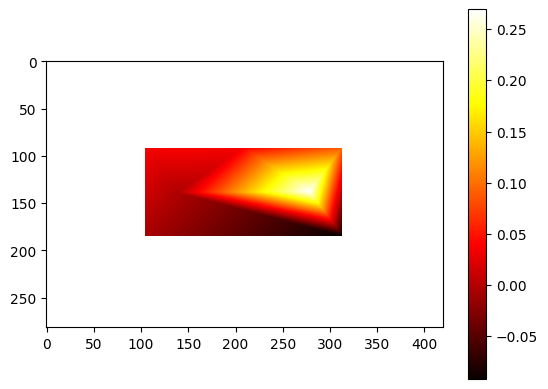

In [17]:
# fig, ax = plt.subplots()

im1=plt.imshow(interp_forcas1, cmap="hot")

plt.colorbar(im1)

## Heatmap POS2 


In [18]:
loc2=loc1
F2=np.zeros(7)

In [19]:
tapetepos2= tapetepos.copy()
for i in range (0,tapetepos.shape[0]):
    for j in range (0,tapetepos.shape[1]):
        if tapetepos[i][j]==1:
            tapetepos2[i][j]=(deltalambda2[0])*DadosVazioKs["K1"]#N
            loc2[0]=([i,j-1])
            F2[0]=tapetepos2[i][j]
            
        if tapetepos[i][j]==2:
            tapetepos2[i][j]=(deltalambda2[1])*DadosVazioKs["K2"] #N
            loc2[1]=([i,j])
            F2[1]=tapetepos2[i][j]

        if tapetepos[i][j]==3:
            tapetepos2[i][j]=(deltalambda2[2])*DadosVazioKs["K3"] #N
            loc2[2]=([i,j-1])
            F2[2]=tapetepos2[i][j]
            
        if tapetepos[i][j]==5:
            tapetepos2[i][j]=((deltalambda2[3])*DadosVazioKs["K5"]) #N
            loc2[3]=([i,j-1])
            F2[3]=tapetepos2[i][j]
            
        if tapetepos[i][j]==6:  
            tapetepos2[i][j]=((deltalambda2[4])*DadosVazioKs["K6"]) #N
            loc2[4]=([i,j-1])
            F2[4]=tapetepos2[i][j]
            
        if tapetepos[i][j]==7:
            tapetepos2[i][j]=((deltalambda2[5])*DadosVazioKs["K7"]) #N
            loc2[5]=([i,j-1])
            F2[5]=tapetepos2[i][j]
            
        if tapetepos[i][j]==8:
            tapetepos2[i][j]=(deltalambda2[6])*DadosVazioKs["K8"] #N
            loc2[6]=([i,j-1])
            F2[6]=tapetepos2[i][j]

In [20]:
interp_forcas2= griddata(loc2,F2,(xx,yy))

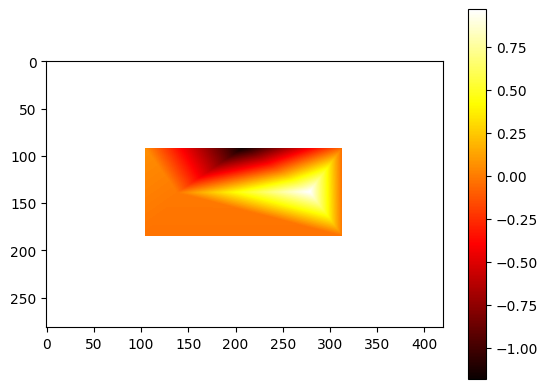

In [21]:
ig, ax = plt.subplots()

im2=plt.imshow(interp_forcas2, cmap="hot",interpolation='hanning')

plt.colorbar(im2)

## Heatmap POS3 

In [22]:
loc3=loc1
F3=np.zeros(7)

In [23]:
tapetepos3= tapetepos.copy()
for i in range (0,tapetepos.shape[0]):
    for j in range (0,tapetepos.shape[1]):
        if tapetepos[i][j]==1:
            tapetepos3[i][j]=(deltalambda3[0])*DadosVazioKs["K1"]#N
            loc3[0]=([i,j-1])
            F3[0]=tapetepos3[i][j]
            
        if tapetepos[i][j]==2:
            tapetepos3[i][j]=(deltalambda3[1])*DadosVazioKs["K2"] #N
            loc3[1]=([i,j])
            F3[1]=tapetepos3[i][j]

        if tapetepos[i][j]==3:
            tapetepos3[i][j]=(deltalambda3[2])*DadosVazioKs["K3"] #N
            loc3[2]=([i,j-1])
            F3[2]=tapetepos3[i][j]

        if tapetepos[i][j]==5:
            tapetepos3[i][j]=((deltalambda3[3])*DadosVazioKs["K5"]) #N
            loc3[3]=([i,j-1])
            F3[3]=tapetepos3[i][j]

        if tapetepos[i][j]==6:  
            tapetepos3[i][j]=((deltalambda3[4])*DadosVazioKs["K6"]) #N
            loc3[4]=([i,j-1])
            F3[4]=tapetepos3[i][j]
            
        if tapetepos[i][j]==7:
            tapetepos3[i][j]=((deltalambda3[5])*DadosVazioKs["K7"]) #N
            loc3[5]=([i,j-1])
            F3[5]=tapetepos3[i][j]
            
        if tapetepos[i][j]==8:
            tapetepos3[i][j]=(deltalambda3[6])*DadosVazioKs["K8"] #N
            loc3[6]=([i,j-1])
            F3[6]=tapetepos3[i][j]

In [24]:
interp_forcas3= griddata(loc3,F3,(xx,yy))

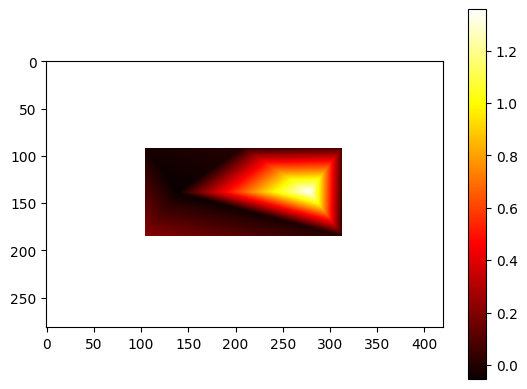

In [25]:
ig, ax = plt.subplots()

im=plt.imshow(interp_forcas3, cmap="hot",interpolation='hanning')

plt.colorbar(im)

## Heatmap POS4

In [26]:
loc4=loc1
F4=np.zeros(7)

In [27]:
tapetepos4= tapetepos.copy()
for i in range (0,tapetepos.shape[0]):
    for j in range (0,tapetepos.shape[1]):
        if tapetepos[i][j]==1:
            tapetepos4[i][j]=(deltalambda4[0])*DadosVazioKs["K1"]#N
            loc4[0]=([i,j-1])
            F4[0]=tapetepos4[i][j]
            
        if tapetepos[i][j]==2:
            tapetepos4[i][j]=(deltalambda4[1])*DadosVazioKs["K2"] #N
            loc4[1]=([i,j])
            F4[1]=tapetepos4[i][j]

        if tapetepos[i][j]==3:
            tapetepos4[i][j]=(deltalambda4[2])*DadosVazioKs["K3"] #N
            loc4[2]=([i,j-1])
            F4[2]=tapetepos4[i][j]
            
        if tapetepos[i][j]==5:
            tapetepos4[i][j]=((deltalambda4[3])*DadosVazioKs["K5"]) #N
            loc4[3]=([i,j-1])
            F4[3]=tapetepos4[i][j]

        if tapetepos[i][j]==6:  
            tapetepos4[i][j]=((deltalambda4[4])*DadosVazioKs["K6"]) #N
            loc4[4]=([i,j-1])
            F4[4]=tapetepos4[i][j]
            
        if tapetepos[i][j]==7:
            tapetepos4[i][j]=((deltalambda4[5])*DadosVazioKs["K7"]) #N
            loc4[5]=([i,j-1])
            F4[5]=tapetepos4[i][j]
            
        if tapetepos[i][j]==8:
            tapetepos4[i][j]=(deltalambda4[6])*DadosVazioKs["K8"] #N
            loc4[6]=([i,j-1])
            F4[6]=tapetepos4[i][j]

In [28]:
interp_forcas4= griddata(loc4,F4,(xx,yy))

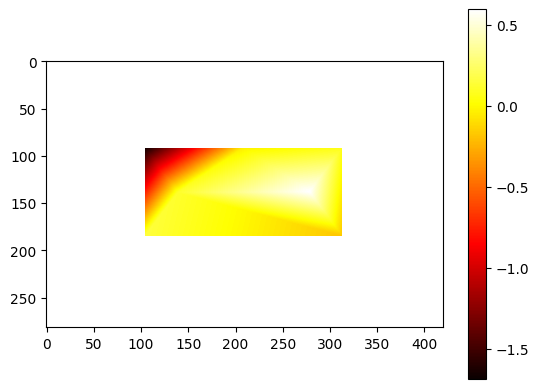

In [29]:
ig, ax = plt.subplots()

im=plt.imshow(interp_forcas4, cmap="hot",interpolation='hanning')

plt.colorbar(im)

# Béquer Vazio: 4 Posições

In [30]:
BequerVaziopos1=pd.read_csv(open("Teste1/Béquer Vazio/N0.2023.05.11.16.00.35(Pos1).txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1","PEAKS2","PEAKS3","PEAKS5","PEAKS6","PEAKS7","PEAKS8"], sep="\t", decimal=",")
BequerVaziopos2=pd.read_csv(open("Teste1/Béquer Vazio/N0.2023.05.11.16.01.12(Pos2).txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1","PEAKS2","PEAKS3","PEAKS5","PEAKS6","PEAKS7","PEAKS8"], sep="\t", decimal=",")
BequerVaziopos3=pd.read_csv(open("Teste1/Béquer Vazio/N0.2023.05.11.16.02.09(Pos3).txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1","PEAKS2","PEAKS3","PEAKS5","PEAKS6","PEAKS7","PEAKS8"], sep="\t", decimal=",")
BequerVaziopos4=pd.read_csv(open("Teste1/Béquer Vazio/N0.2023.05.11.16.03.24(Pos4).txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1","PEAKS2","PEAKS3","PEAKS5","PEAKS6","PEAKS7","PEAKS8"], sep="\t", decimal=",")


## $\Delta \lambda $ POS1

In [31]:
deltalambdaB1=np.zeros(7)

deltalambdaB1[0]= medias[0] - BequerVaziopos1['PEAKS1'].mean()
deltalambdaB1[1]= medias[1] - BequerVaziopos1['PEAKS2'].mean()
deltalambdaB1[2]= medias[2] - BequerVaziopos1['PEAKS3'].mean()

deltalambdaB1[3]= medias[3] - BequerVaziopos1['PEAKS5'].mean()
deltalambdaB1[4]= medias[4] - BequerVaziopos1['PEAKS6'].mean()
deltalambdaB1[5]= medias[5] - BequerVaziopos1['PEAKS7'].mean()
deltalambdaB1[6]= medias[6] - BequerVaziopos1['PEAKS8'].mean()

## $\Delta \lambda $ POS2

In [32]:
deltalambdaB2=np.zeros(7)

deltalambdaB2[0]= medias[0] - BequerVaziopos2['PEAKS1'].mean()
deltalambdaB2[1]= medias[1] - BequerVaziopos2['PEAKS2'].mean()
deltalambdaB2[2]= medias[2] - BequerVaziopos2['PEAKS3'].mean()

deltalambdaB2[3]= medias[3] - BequerVaziopos2['PEAKS5'].mean()
deltalambdaB2[4]= medias[4] - BequerVaziopos2['PEAKS6'].mean()
deltalambdaB2[5]= medias[5] - BequerVaziopos2['PEAKS7'].mean()
deltalambdaB2[6]= medias[6] - BequerVaziopos2['PEAKS8'].mean()

## $\Delta \lambda $ POS3

In [33]:
deltalambdaB3=np.zeros(7)

deltalambdaB3[0]= medias[0] - BequerVaziopos3['PEAKS1'].mean()
deltalambdaB3[1]= medias[1] - BequerVaziopos3['PEAKS2'].mean()
deltalambdaB3[2]= medias[2] - BequerVaziopos3['PEAKS3'].mean()

deltalambdaB3[3]= medias[3] - BequerVaziopos3['PEAKS5'].mean()
deltalambdaB3[4]= medias[4] - BequerVaziopos3['PEAKS6'].mean()
deltalambdaB3[5]= medias[5] - BequerVaziopos3['PEAKS7'].mean()
deltalambdaB3[6]= medias[6] - BequerVaziopos3['PEAKS8'].mean()

## $\Delta \lambda $ POS4

In [34]:
deltalambdaB4=np.zeros(7)

deltalambdaB4[0]= medias[0] - BequerVaziopos4['PEAKS1'].mean()
deltalambdaB4[1]= medias[1] - BequerVaziopos4['PEAKS2'].mean()
deltalambdaB4[2]= medias[2] - BequerVaziopos4['PEAKS3'].mean()

deltalambdaB4[3]= medias[3] - BequerVaziopos4['PEAKS5'].mean()
deltalambdaB4[4]= medias[4] - BequerVaziopos4['PEAKS6'].mean()
deltalambdaB4[5]= medias[5] - BequerVaziopos4['PEAKS7'].mean()
deltalambdaB4[6]= medias[6] - BequerVaziopos4['PEAKS8'].mean()

## Heatmap POS1 

In [35]:
locB1=np.zeros((7,2))
FB1=np.zeros(7)
tapeteposB1=tapetepos.copy()


In [36]:

for i in range (0,tapetepos.shape[0]):
    for j in range (0,tapetepos.shape[1]):
        if tapetepos[i][j]==1:
            tapeteposB1[i][j]=(deltalambdaB1[0])*DadosVazioKs["K1"]#N
            locB1[0]=([i,j-1])
            FB1[0]=tapeteposB1[i][j]
            
        if tapetepos[i][j]==2:
            tapeteposB1[i][j]=(deltalambdaB1[1])*DadosVazioKs["K2"] #N
            locB1[1]=([i,j])
            FB1[1]=tapeteposB1[i][j]

        if tapetepos[i][j]==3:
            tapeteposB1[i][j]=(deltalambdaB1[2])*DadosVazioKs["K3"] #N
            locB1[2]=([i,j-1])
            FB1[2]=tapeteposB1[i][j]

        if tapetepos[i][j]==5:
            tapeteposB1[i][j]=((deltalambdaB1[3])*DadosVazioKs["K5"]) #N
            locB1[3]=([i,j-1])
            FB1[3]=tapeteposB1[i][j]

        if tapetepos[i][j]==6:  
            tapeteposB1[i][j]=((deltalambdaB1[4])*DadosVazioKs["K6"]) #N
            locB1[4]=([i,j-1])
            FB1[4]=tapeteposB1[i][j]
            
        if tapetepos[i][j]==7:
            tapeteposB1[i][j]=((deltalambdaB1[5])*DadosVazioKs["K7"]) #N
            locB1[5]=([i,j-1])
            FB1[5]=tapeteposB1[i][j]
            
        if tapetepos[i][j]==8:
            tapeteposB1[i][j]=(deltalambdaB1[6])*DadosVazioKs["K8"] #N
            locB1[6]=([i,j-1])
            FB1[6]=tapeteposB1[i][j]

In [37]:
interp_forcasB1= griddata(locB1,FB1,(xx,yy))

Text(0, 0.5, 'x')

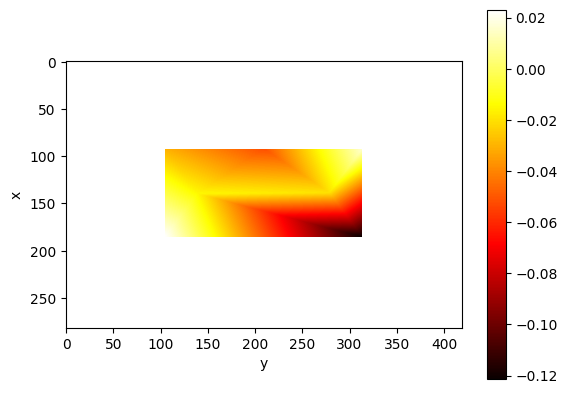

In [38]:
# fig, ax = plt.subplots()

im1=plt.imshow(interp_forcasB1, cmap="hot")

plt.colorbar(im1)
plt.xlabel('y')
plt.ylabel('x')

## Heatmap POS2

In [39]:
locB2=np.zeros((7,2))
FB2=np.zeros(7)
tapeteposB2=tapetepos.copy()

In [40]:
for i in range (0,tapetepos.shape[0]):
    for j in range (0,tapetepos.shape[1]):
        if tapetepos[i][j]==1:
            tapeteposB2[i][j]=(deltalambdaB2[0])*DadosVazioKs["K1"]#N
            locB2[0]=([i,j-1])
            FB2[0]=tapeteposB2[i][j]
            
        if tapetepos[i][j]==2:
            tapeteposB2[i][j]=(deltalambdaB2[1])*DadosVazioKs["K2"] #N
            locB2[1]=([i,j])
            FB2[1]=tapeteposB2[i][j]

        if tapetepos[i][j]==3:
            tapeteposB2[i][j]=(deltalambdaB2[2])*DadosVazioKs["K3"] #N
            locB2[2]=([i,j-1])
            FB2[2]=tapeteposB2[i][j]

        if tapetepos[i][j]==5:
            tapeteposB2[i][j]=((deltalambdaB2[3])*DadosVazioKs["K5"]) #N
            locB2[3]=([i,j-1])
            FB2[3]=tapeteposB2[i][j]

        if tapetepos[i][j]==6:  
            tapeteposB2[i][j]=((deltalambdaB2[4])*DadosVazioKs["K6"]) #N
            locB2[4]=([i,j-1])
            FB2[4]=tapeteposB2[i][j]
            
        if tapetepos[i][j]==7:
            tapeteposB2[i][j]=((deltalambdaB2[5])*DadosVazioKs["K7"]) #N
            locB2[5]=([i,j-1])
            FB2[5]=tapeteposB2[i][j]
            
        if tapetepos[i][j]==8:
            tapeteposB2[i][j]=(deltalambdaB2[6])*DadosVazioKs["K8"] #N
            locB2[6]=([i,j-1])
            FB2[6]=tapeteposB2[i][j]

Text(0, 0.5, 'x')

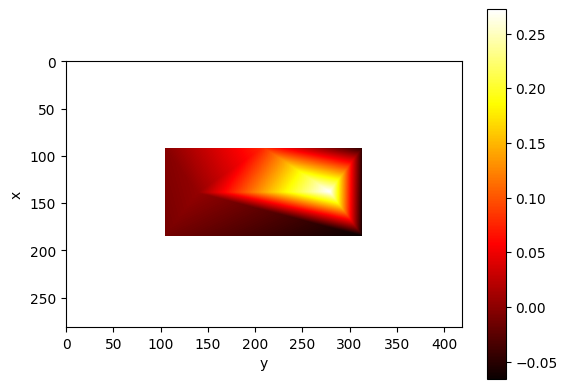

In [41]:
interp_forcasB2= griddata(locB2,FB2,(xx,yy))


im1=plt.imshow(interp_forcasB2, cmap="hot")

plt.colorbar(im1)
plt.xlabel('y')
plt.ylabel('x')

## Heatmap POS3 

In [42]:
locB3=np.zeros((7,2))
FB3=np.zeros(7)
tapeteposB3=tapetepos.copy()

In [43]:
for i in range (0,tapetepos.shape[0]):
    for j in range (0,tapetepos.shape[1]):
        if tapetepos[i][j]==1:
            tapeteposB3[i][j]=(deltalambdaB3[0])*DadosVazioKs["K1"]#N
            locB3[0]=([i,j-1])
            FB3[0]=tapeteposB3[i][j]
            
        if tapetepos[i][j]==2:
            tapeteposB3[i][j]=(deltalambdaB3[1])*DadosVazioKs["K2"] #N
            locB3[1]=([i,j])
            FB3[1]=tapeteposB3[i][j]

        if tapetepos[i][j]==3:
            tapeteposB3[i][j]=(deltalambdaB3[2])*DadosVazioKs["K3"] #N
            locB3[2]=([i,j-1])
            FB3[2]=tapeteposB3[i][j]

        if tapetepos[i][j]==5:
            tapeteposB3[i][j]=((deltalambdaB3[3])*DadosVazioKs["K5"]) #N
            locB3[3]=([i,j-1])
            FB3[3]=tapeteposB3[i][j]

        if tapetepos[i][j]==6:  
            tapeteposB3[i][j]=((deltalambdaB3[4])*DadosVazioKs["K6"]) #N
            locB3[4]=([i,j-1])
            FB3[4]=tapeteposB3[i][j]
            
        if tapetepos[i][j]==7:
            tapeteposB3[i][j]=((deltalambdaB3[5])*DadosVazioKs["K7"]) #N
            locB3[5]=([i,j-1])
            FB3[5]=tapeteposB3[i][j]
            
        if tapetepos[i][j]==8:
            tapeteposB3[i][j]=(deltalambdaB3[6])*DadosVazioKs["K8"] #N
            locB3[6]=([i,j-1])
            FB3[6]=tapeteposB3[i][j]

Text(0, 0.5, 'y')

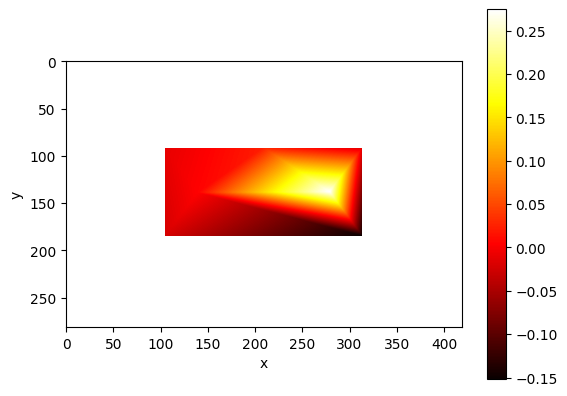

In [44]:
interp_forcasB3= griddata(locB3,FB3,(xx,yy))


im1=plt.imshow(interp_forcasB3  , cmap="hot")

plt.colorbar(im1)
plt.xlabel('x')
plt.ylabel('y')

In [45]:
interp_forcasB2 == interp_forcasB3

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## Heatmap POS4

In [46]:
locB4=np.zeros((7,2))
FB4=np.zeros(7)
tapeteposB4=tapetepos.copy()

In [47]:
for i in range (0,tapetepos.shape[0]):
    for j in range (0,tapetepos.shape[1]):
        if tapetepos[i][j]==1:
            tapeteposB4[i][j]=(deltalambdaB4[0])*DadosVazioKs["K1"]#N
            locB4[0]=([i,j-1])
            FB4[0]=tapeteposB4[i][j]
            
        if tapetepos[i][j]==2:
            tapeteposB4[i][j]=(deltalambdaB4[1])*DadosVazioKs["K2"] #N
            locB4[1]=([i,j])
            FB4[1]=tapeteposB4[i][j]

        if tapetepos[i][j]==3:
            tapeteposB4[i][j]=(deltalambdaB4[2])*DadosVazioKs["K3"] #N
            locB4[2]=([i,j-1])
            FB4[2]=tapeteposB4[i][j]

        if tapetepos[i][j]==5:
            tapeteposB4[i][j]=((deltalambdaB4[3])*DadosVazioKs["K5"]) #N
            locB4[3]=([i,j-1])
            FB4[3]=tapeteposB4[i][j]

        if tapetepos[i][j]==6:  
            tapeteposB4[i][j]=((deltalambdaB4[4])*DadosVazioKs["K6"]) #N
            locB4[4]=([i,j-1])
            FB4[4]=tapeteposB4[i][j]
            
        if tapetepos[i][j]==7:
            tapeteposB4[i][j]=((deltalambdaB4[5])*DadosVazioKs["K7"]) #N
            locB4[5]=([i,j-1])
            FB4[5]=tapeteposB4[i][j]
            
        if tapetepos[i][j]==8:
            tapeteposB4[i][j]=(deltalambdaB4[6])*DadosVazioKs["K8"] #N
            locB4[6]=([i,j-1])
            FB4[6]=tapeteposB4[i][j]

Text(0, 0.5, 'y')

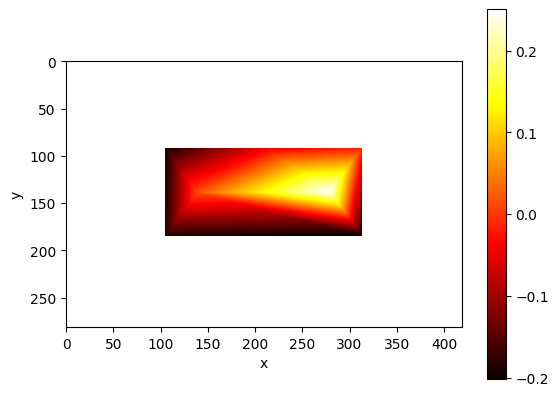

In [48]:
interp_forcasB4= griddata(locB4,FB4,(xx,yy))


im1=plt.imshow(interp_forcasB4 , cmap="hot")

plt.colorbar(im1)
plt.xlabel('x')
plt.ylabel('y')

# Béquer 500 mL


In [49]:
Bequer500pos1=pd.read_csv(open("Teste1/Béquer 500mL/N0.2023.05.11.16.09.54(Pos1).txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1","PEAKS2","PEAKS3","PEAKS5","PEAKS6","PEAKS7","PEAKS8"], sep="\t", decimal=",")
Bequer500pos2=pd.read_csv(open("Teste1/Béquer 500mL/N0.2023.05.11.16.10.54(Pos2).txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1","PEAKS2","PEAKS3","PEAKS5","PEAKS6","PEAKS7","PEAKS8"], sep="\t", decimal=",")
Bequer500pos3=pd.read_csv(open("Teste1/Béquer 500mL/N0.2023.05.11.16.11.52(Pos3).txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1","PEAKS2","PEAKS3","PEAKS5","PEAKS6","PEAKS7","PEAKS8"], sep="\t", decimal=",")
Bequer500pos4=pd.read_csv(open("Teste1/Béquer 500mL/N0.2023.05.11.16.13.20(Pos4).txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1","PEAKS2","PEAKS3","PEAKS5","PEAKS6","PEAKS7","PEAKS8"], sep="\t", decimal=",")


## $\Delta \lambda$ POS1

In [53]:
deltalambdaC1=np.zeros(7)

deltalambdaC1[0]= medias[0] - Bequer500pos1['PEAKS1'].mean()
deltalambdaC1[1]= medias[1] - Bequer500pos1['PEAKS2'].mean()
deltalambdaC1[2]= medias[2] - Bequer500pos1['PEAKS3'].mean()

deltalambdaC1[3]= medias[3] - Bequer500pos1['PEAKS5'].mean()
deltalambdaC1[4]= medias[4] - Bequer500pos1['PEAKS6'].mean()
deltalambdaC1[5]= medias[5] - Bequer500pos1['PEAKS7'].mean()
deltalambdaC1[6]= medias[6] - Bequer500pos1['PEAKS8'].mean()

## $\Delta \lambda $ POS2

In [54]:
deltalambdaC2=np.zeros(7)

deltalambdaC2[0]= medias[0] - Bequer500pos2['PEAKS1'].mean()
deltalambdaC2[1]= medias[1] - Bequer500pos2['PEAKS2'].mean()
deltalambdaC2[2]= medias[2] - Bequer500pos2['PEAKS3'].mean()

deltalambdaC2[3]= medias[3] - Bequer500pos2['PEAKS5'].mean()
deltalambdaC2[4]= medias[4] - Bequer500pos2['PEAKS6'].mean()
deltalambdaC2[5]= medias[5] - Bequer500pos2['PEAKS7'].mean()
deltalambdaC2[6]= medias[6] - Bequer500pos2['PEAKS8'].mean()

## $\Delta \lambda $ POS3

In [69]:
deltalambdaC3=np.zeros(7)

deltalambdaC3[0]= medias[0] - Bequer500pos3['PEAKS1'].mean()
deltalambdaC3[1]= medias[1] - Bequer500pos3['PEAKS2'].mean()
deltalambdaC3[2]= medias[2] - Bequer500pos3['PEAKS3'].mean()

deltalambdaC3[3]= medias[3] - Bequer500pos3['PEAKS5'].mean()
deltalambdaC3[4]= medias[4] - Bequer500pos3['PEAKS6'].mean()
deltalambdaC3[5]= medias[5] - Bequer500pos3['PEAKS7'].mean()
deltalambdaC3[6]= medias[6] - Bequer500pos3['PEAKS8'].mean()

## $\Delta \lambda $ POS4

In [71]:
deltalambdaC4=np.zeros(7)

deltalambdaC4[0]= medias[0] - Bequer500pos4['PEAKS1'].mean()
deltalambdaC4[1]= medias[1] - Bequer500pos4['PEAKS2'].mean()
deltalambdaC4[2]= medias[2] - Bequer500pos4['PEAKS3'].mean()

deltalambdaC4[4]= medias[4] - Bequer500pos4['PEAKS5'].mean()
deltalambdaC4[4]= medias[4] - Bequer500pos4['PEAKS6'].mean()
deltalambdaC4[5]= medias[5] - Bequer500pos4['PEAKS7'].mean()
deltalambdaC4[6]= medias[6] - Bequer500pos4['PEAKS8'].mean()

## Heatmap POS1 

In [55]:
locC1=np.zeros((7,2))
FC1=np.zeros(7)
tapeteposC1=tapetepos.copy()

In [56]:

for i in range (0,tapetepos.shape[0]):
    for j in range (0,tapetepos.shape[1]):
        if tapetepos[i][j]==1:
            tapeteposC1[i][j]=(deltalambdaC1[0])*DadosVazioKs["K1"]#N
            locC1[0]=([i,j-1])
            FC1[0]=tapeteposC1[i][j]
            
        if tapetepos[i][j]==2:
            tapeteposC1[i][j]=(deltalambdaC1[1])*DadosVazioKs["K2"] #N
            locC1[1]=([i,j])
            FC1[1]=tapeteposC1[i][j]

        if tapetepos[i][j]==3:
            tapeteposC1[i][j]=(deltalambdaC1[2])*DadosVazioKs["K3"] #N
            locC1[2]=([i,j-1])
            FC1[2]=tapeteposC1[i][j]

        if tapetepos[i][j]==5:
            tapeteposC1[i][j]=((deltalambdaC1[3])*DadosVazioKs["K5"]) #N
            locC1[3]=([i,j-1])
            FC1[3]=tapeteposC1[i][j]

        if tapetepos[i][j]==6:  
            tapeteposC1[i][j]=((deltalambdaC1[4])*DadosVazioKs["K6"]) #N
            locC1[4]=([i,j-1])
            FC1[4]=tapeteposC1[i][j]
            
        if tapetepos[i][j]==7:
            tapeteposC1[i][j]=((deltalambdaC1[5])*DadosVazioKs["K7"]) #N
            locC1[5]=([i,j-1])
            FC1[5]=tapeteposC1[i][j]
            
        if tapetepos[i][j]==8:
            tapeteposC1[i][j]=(deltalambdaC1[6])*DadosVazioKs["K8"] #N
            locC1[6]=([i,j-1])
            FC1[6]=tapeteposC1[i][j]

Text(0, 0.5, 'y')

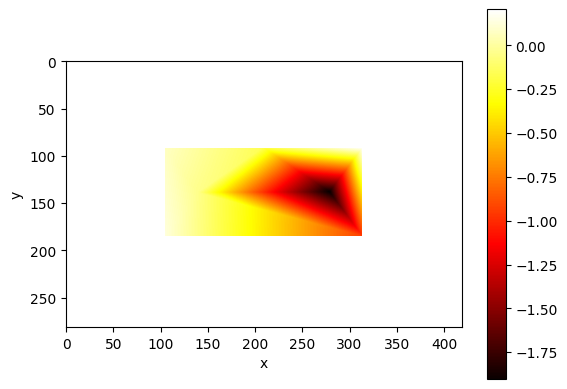

In [58]:
interp_forcasC1= griddata(locC1,FC1,(xx,yy))


im1=plt.imshow(interp_forcasC1 , cmap="hot")

plt.colorbar(im1)
plt.xlabel('x')
plt.ylabel('y')

## Heatmap POS2

In [63]:
locC2=np.zeros((7,2))
FC2=np.zeros(7)
tapeteposC2=tapetepos.copy()

In [64]:

for i in range (0,tapetepos.shape[0]):
    for j in range (0,tapetepos.shape[1]):
        if tapetepos[i][j]==1:
            tapeteposC2[i][j]=(deltalambdaC2[0])*DadosVazioKs["K1"]#N
            locC2[0]=([i,j-1])
            FC2[0]=tapeteposC2[i][j]
            
        if tapetepos[i][j]==2:
            tapeteposC2[i][j]=(deltalambdaC2[1])*DadosVazioKs["K2"] #N
            locC2[1]=([i,j])
            FC2[1]=tapeteposC2[i][j]

        if tapetepos[i][j]==3:
            tapeteposC2[i][j]=(deltalambdaC2[2])*DadosVazioKs["K3"] #N
            locC2[2]=([i,j-1])
            FC2[2]=tapeteposC2[i][j]

        if tapetepos[i][j]==5:
            tapeteposC2[i][j]=((deltalambdaC2[3])*DadosVazioKs["K5"]) #N
            locC2[3]=([i,j-1])
            FC2[3]=tapeteposC2[i][j]

        if tapetepos[i][j]==6:  
            tapeteposC2[i][j]=((deltalambdaC2[4])*DadosVazioKs["K6"]) #N
            locC2[4]=([i,j-1])
            FC2[4]=tapeteposC2[i][j]
            
        if tapetepos[i][j]==7:
            tapeteposC2[i][j]=((deltalambdaC2[5])*DadosVazioKs["K7"]) #N
            locC2[5]=([i,j-1])
            FC2[5]=tapeteposC2[i][j]
            
        if tapetepos[i][j]==8:
            tapeteposC2[i][j]=(deltalambdaC2[6])*DadosVazioKs["K8"] #N
            locC2[6]=([i,j-1])
            FC2[6]=tapeteposC2[i][j]

Text(0, 0.5, 'y')

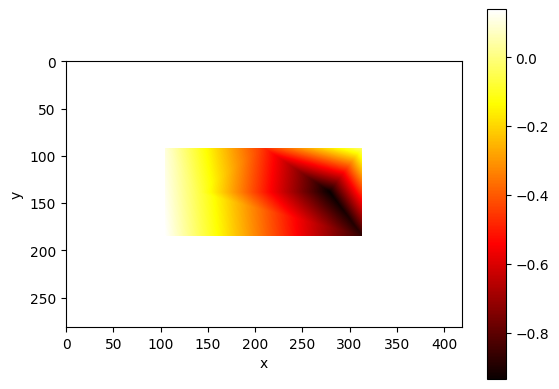

In [65]:
interp_forcasC2= griddata(locC2,FC2,(xx,yy))


im1=plt.imshow(interp_forcasC2 , cmap="hot")

plt.colorbar(im1)
plt.xlabel('x')
plt.ylabel('y')

## Heatpmap POS3 

In [67]:
locC3=np.zeros((7,2))
FC3=np.zeros(7)
tapeteposC3=tapetepos.copy()

In [72]:
for i in range (0,tapetepos.shape[0]):
    for j in range (0,tapetepos.shape[1]):
        if tapetepos[i][j]==1:
            tapeteposC3[i][j]=(deltalambdaC3[0])*DadosVazioKs["K1"]#N
            locC3[0]=([i,j-1])
            FC3[0]=tapeteposC3[i][j]
            
        if tapetepos[i][j]==2:
            tapeteposC3[i][j]=(deltalambdaC3[1])*DadosVazioKs["K2"] #N
            locC3[1]=([i,j])
            FC3[1]=tapeteposC3[i][j]

        if tapetepos[i][j]==3:
            tapeteposC3[i][j]=(deltalambdaC3[2])*DadosVazioKs["K3"] #N
            locC3[2]=([i,j-1])
            FC3[2]=tapeteposC3[i][j]

        if tapetepos[i][j]==5:
            tapeteposC3[i][j]=((deltalambdaC3[3])*DadosVazioKs["K5"]) #N
            locC3[3]=([i,j-1])
            FC3[3]=tapeteposC3[i][j]

        if tapetepos[i][j]==6:  
            tapeteposC3[i][j]=((deltalambdaC3[4])*DadosVazioKs["K6"]) #N
            locC3[4]=([i,j-1])
            FC3[4]=tapeteposC3[i][j]
            
        if tapetepos[i][j]==7:
            tapeteposC3[i][j]=((deltalambdaC3[5])*DadosVazioKs["K7"]) #N
            locC3[5]=([i,j-1])
            FC3[5]=tapeteposC3[i][j]
            
        if tapetepos[i][j]==8:
            tapeteposC3[i][j]=(deltalambdaC3[6])*DadosVazioKs["K8"] #N
            locC3[6]=([i,j-1])
            FC3[6]=tapeteposC3[i][j]
            


Text(0, 0.5, 'y')

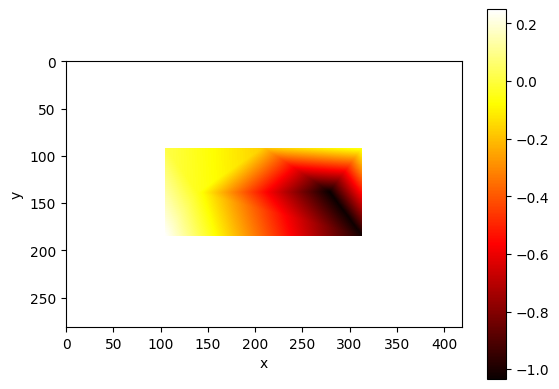

In [73]:
interp_forcasC3= griddata(locC3,FC3,(xx,yy))


im1=plt.imshow(interp_forcasC3 , cmap="hot")

plt.colorbar(im1)
plt.xlabel('x')
plt.ylabel('y')

# Heatmap POS4

In [74]:
locC4=np.zeros((7,2))
FC4=np.zeros(7)
tapeteposC4=tapetepos.copy()

In [75]:
for i in range (0,tapetepos.shape[0]):
    for j in range (0,tapetepos.shape[1]):
        if tapetepos[i][j]==1:
            tapeteposC4[i][j]=(deltalambdaC4[0])*DadosVazioKs["K1"]#N
            locC4[0]=([i,j-1])
            FC4[0]=tapeteposC4[i][j]
            
        if tapetepos[i][j]==2:
            tapeteposC4[i][j]=(deltalambdaC4[1])*DadosVazioKs["K2"] #N
            locC4[1]=([i,j])
            FC4[1]=tapeteposC4[i][j]

        if tapetepos[i][j]==3:
            tapeteposC4[i][j]=(deltalambdaC4[2])*DadosVazioKs["K3"] #N
            locC4[2]=([i,j-1])
            FC4[2]=tapeteposC4[i][j]

        if tapetepos[i][j]==5:
            tapeteposC4[i][j]=((deltalambdaC4[3])*DadosVazioKs["K5"]) #N
            locC4[3]=([i,j-1])
            FC4[3]=tapeteposC4[i][j]

        if tapetepos[i][j]==6:  
            tapeteposC4[i][j]=((deltalambdaC4[4])*DadosVazioKs["K6"]) #N
            locC4[4]=([i,j-1])
            FC4[4]=tapeteposC4[i][j]
            
        if tapetepos[i][j]==7:
            tapeteposC4[i][j]=((deltalambdaC4[5])*DadosVazioKs["K7"]) #N
            locC4[5]=([i,j-1])
            FC4[5]=tapeteposC4[i][j]
            
        if tapetepos[i][j]==8:
            tapeteposC4[i][j]=(deltalambdaC4[6])*DadosVazioKs["K8"] #N
            locC4[6]=([i,j-1])
            FC4[6]=tapeteposC4[i][j]
   

Text(0, 0.5, 'y')

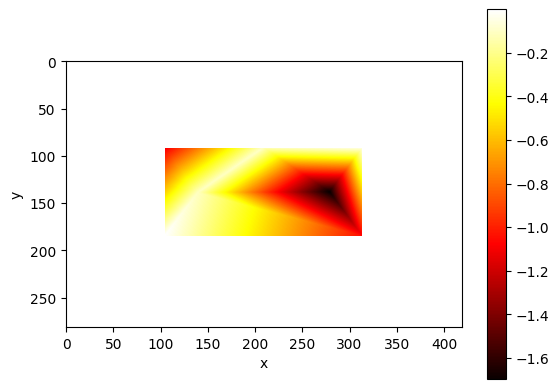

In [76]:
interp_forcasC4= griddata(locC4,FC4,(xx,yy))


im1=plt.imshow(interp_forcasC4 , cmap="hot")

plt.colorbar(im1)
plt.xlabel('x')
plt.ylabel('y')

# Bequer cheio: 4 posições